<h1> Linear Algebra (CpE210A)</h1>
    
<h3> Laboratory 2: Plotting Vectors using NumPy and MatPlotLib </h3>
    
Coded and submitted by:<br>
<i>Datay, Danica Mae L.<br>
58011</i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [109]:
def track_eagle(make_figs=True):
    lng = np.random.randint(-10,10, size=3) ## since we don't actually have eagle tracking data we will use
    lat = np.random.randint(-10,10, size=3)
    
    dist1 = np.array((lng[0], lat[0]))
    dist2 = np.array((lng[1], lat[1]))
    dist3 = np.array((lng[2], lat[2]))
    
    dist_total = dist1 + dist2 + dist3
    dispmnt = np.linalg.norm(dist_total)
    alpha = 10**-6
    theta = np.arctan(dist_total[1]/(dist_total[0]+alpha))
    theta = np.degrees(theta)
    
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    ### Self-discovery code block (Refer to guide question 2 for the task)
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(dispmnt, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(dispmnt)}@{int(theta)}.png', dpi=300)
    
    print(dist1)
    print(dist2)
    print(dist3)
    print(dist_total)
    print(dispmnt)
    print(theta)
    
    plt.show()

[1 1]
[-1  8]
[4 2]
[ 4 11]
11.704699910719626
70.0168888777091


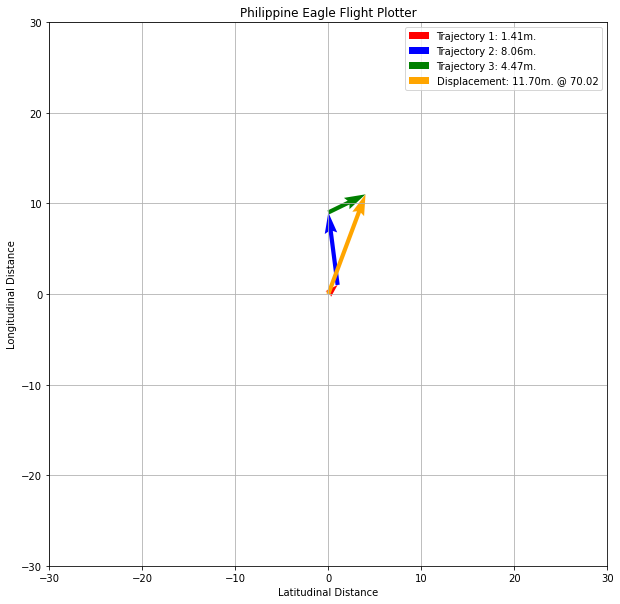

In [112]:
track_eagle(make_figs=True)

In [107]:
def eagle_kinematics(spd, time):  ## creating a function. spd for speed
    req_shape = 4
    velo = np.zeros((req_shape-1,))  ## velo for velocity
    acce = np.zeros((req_shape-2,))  ## acce for acceleration
    time_vect = np.array([time**3, time**2, time, 1])  ##creating an array for vector time
    if spd.shape == (req_shape,):
        velo = np.array([3*spd[0],2*spd[1], spd[2]])  ##creating an array for velocity
        acce = np.array([2*velo[0],velo[1]])  ##creating an array for acceleration
        spd_time = np.sum(np.multiply(spd, time_vect))  ##speed respect to time
        velo_time = np.sum(np.multiply(velo, time_vect[1:]))  ##velocity respect to time
        acce_time = np.sum(np.multiply(acce, time_vect[2:]))  ##acceleration respect to time
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return spd_time, velo_time, acce_time

In [108]:
spd = np.array([2,1,3,2]) ## giving a value for speed
time = 2
eagle_kinematics(spd, time)  ##printing the output

(28, 31, 26)